### Import libraries

In [1]:
import pandas as pd
import numpy as np

### Load the dataset

In [2]:
df = pd.read_csv('crx.data')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [3]:
# include first row as part of data
df = pd.read_csv('crx.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


### Preparing the data

In [4]:
# assign column names
usecol = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']
df = pd.read_csv('crx.data', header=None, names = usecol)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
df.shape

(690, 16)

In [6]:
df.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
df.A16.unique()

array(['+', '-'], dtype=object)

In [8]:
# change + and - characters into numerical
def approved(x):
    if x == '+':
        return 1
    if x == '-':
        return 0

In [9]:
df['A16'] = df['A16'].apply(approved)
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [10]:
df['A16'].unique()

array([1, 0], dtype=int64)

In [11]:
for column in df:
    print('nunique for', column, 'is', df[column].nunique())

nunique for A1 is 3
nunique for A2 is 350
nunique for A3 is 215
nunique for A4 is 4
nunique for A5 is 4
nunique for A6 is 15
nunique for A7 is 10
nunique for A8 is 132
nunique for A9 is 2
nunique for A10 is 2
nunique for A11 is 23
nunique for A12 is 2
nunique for A13 is 3
nunique for A14 is 171
nunique for A15 is 240
nunique for A16 is 2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


In [13]:
# replace ? symbol with na 
df['A2'] = df.A2.replace('?', np.NaN)
df['A14'] = df.A14.replace('?', np.NaN)

In [14]:
# convert str to numeric
df['A2'] = df.A2.astype(float)
df['A14'] = df.A14.astype(float)

In [15]:
# check if there are missing values
df.isnull().sum()

A1      0
A2     12
A3      0
A4      0
A5      0
A6      0
A7      0
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [16]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [17]:
df.A2.mode()

0    22.67
dtype: float64

In [18]:
df.A14.mean()

184.01477104874445

In [19]:
# fill missing values with mode
df['A2'].fillna(df['A2'].mode()[0], inplace=True)

In [20]:
# fill missing values with mean
df['A14'].fillna(df['A14'].mean(), inplace=True)

In [21]:
# check if there are missing values left
df[df.A2.isnull()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16


In [22]:
# check if there are missing values left
df[df.A14.isnull()]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16


In [23]:
df.describe()

,A2,A3,A8,A11,A14,A15,A16
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000
mean,31.413420,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.910293,4.978163,3.346513,4.86294,172.159274,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,80.000000,0.000000,0.000000
50%,28.170000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


### Understanding the distribution of numerical values

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

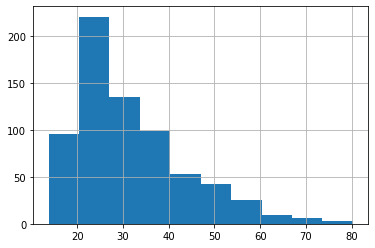

In [25]:
# Histogram of A2, A3, A8, A11, A14, A15, A16
df['A2'].hist()

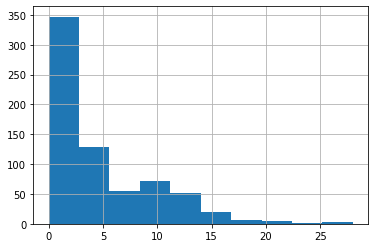

In [26]:
df['A3'].hist()

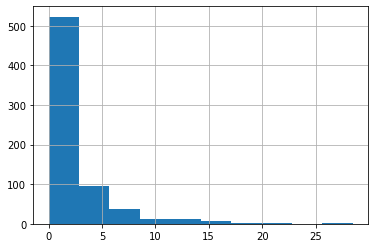

In [27]:
df['A8'].hist()

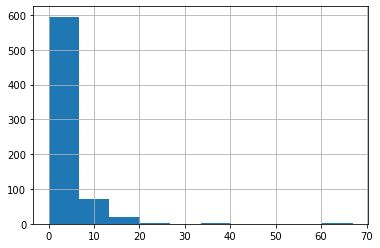

In [28]:
df['A11'].hist()

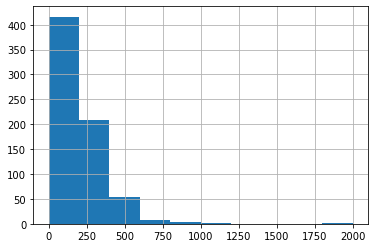

In [29]:
df['A14'].hist()

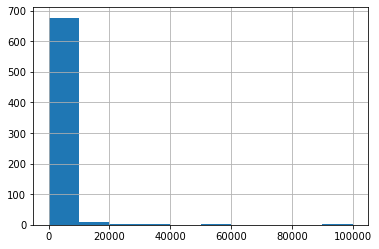

In [30]:
df['A15'].hist()

#### almost all numerical features is right skeewed 

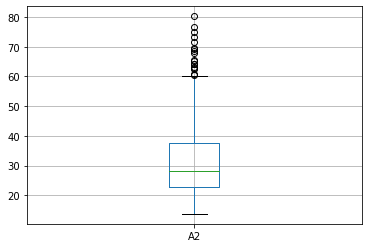

In [31]:
df.boxplot(column='A2')

In [32]:
# Get the unique values and their frequency of variable A16

df['A16'].value_counts()

0    383
1    307
Name: A16, dtype: int64

### Perform normalization to dataset

In [33]:
# perform label encoding
cat_feat = []

for column in df:
    if df[column].dtype == 'object':
        cat_feat.append(column)

print(cat_feat)

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
df_le = df[cat_feat]

for feature in cat_feat:
    le = LabelEncoder()
    df_le[feature] = le.fit_transform(df_le[feature].values)
    for column in df_le:
        df[column] = df_le[column]

print(df.shape)

(690, 16)


<ipython-input-35-19c77d304f5e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_le[feature] = le.fit_transform(df_le[feature].values)


In [36]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202.0,0,1
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43.0,560,1
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280.0,824,1
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100.0,3,1
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120.0,0,1


In [37]:
# drop label/target column
y = pd.DataFrame(df.A16)
X_df = df.drop(['A16'], 1)
print(X_df.head())
print(y)

   A1     A2     A3  A4  A5  A6  A7    A8  A9  A10  A11  A12  A13    A14  A15
0   2  30.83  0.000   2   1  13   8  1.25   1    1    1    0    0  202.0    0
1   1  58.67  4.460   2   1  11   4  3.04   1    1    6    0    0   43.0  560
2   1  24.50  0.500   2   1  11   4  1.50   1    0    0    0    0  280.0  824
3   2  27.83  1.540   2   1  13   8  3.75   1    1    5    1    0  100.0    3
4   2  20.17  5.625   2   1  13   8  1.71   1    0    0    0    2  120.0    0
     A16
0      1
1      1
2      1
3      1
4      1
..   ...
685    0
686    0
687    0
688    0
689    0

[690 rows x 1 columns]


In [38]:
# normalization of X_train and X_test
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit scaler on training and testing data
X_scale = scaler.fit_transform(X_df)

### Perform clustering

In [39]:
# Building and running model
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
clustering = KMeans(n_clusters=2, random_state=12)
clustering.fit(X_scale)

KMeans(n_clusters=2, random_state=12)

In [41]:
# clusters prediction
y_km = clustering.fit_predict(X_scale)

In [42]:
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [43]:
# incorporate cluster prediction into dataset
X_df['A16'] = y
X_df['cluster_pred'] = y_km
X_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,cluster_pred
0,2,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,202.0,0,1,1
1,1,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,43.0,560,1,1
2,1,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,280.0,824,1,1
3,2,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,100.0,3,1,1
4,2,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,120.0,0,1,1


No handles with labels found to put in legend.
No handles with labels found to put in legend.


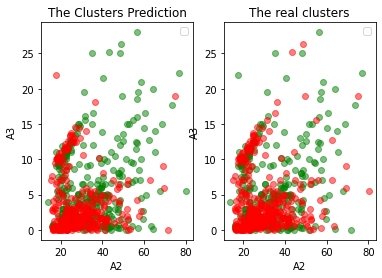

In [44]:
# create scatter plot to visualize the predicted clusters 
# and compare it to the real clusters
X_df1 = X_df[X_df.cluster_pred==1]
X_df2 = X_df[X_df.cluster_pred==0]

X_A16_1 = X_df[X_df.A16==1]
X_A16_2 = X_df[X_df.A16==0]

plt.subplot(1,2,1)
plt.scatter(X_df1.A2, X_df1.A3, color='green', alpha = 0.5)
plt.scatter(X_df2.A2, X_df2.A3, color='red', alpha = 0.5)

plt.xlabel('A2')
plt.ylabel('A3')
plt.title('The Clusters Prediction')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_A16_1.A2, X_A16_1.A3, color='green', alpha = 0.5)
plt.scatter(X_A16_2.A2, X_A16_2.A3, color='red', alpha = 0.5)

plt.xlabel('A2')
plt.ylabel('A3')
plt.title('The real clusters')
plt.legend()

In [45]:
clustering.cluster_centers_

array([[8.23708207e-01, 2.27376648e-01, 1.24486539e-01, 7.51773050e-01,
        5.27862209e-01, 4.39861051e-01, 6.66666667e-01, 3.55255159e-02,
        8.88178420e-16, 2.03647416e-01, 6.98634487e-03, 4.10334347e-01,
        1.21580547e-01, 9.80792518e-02, 5.26492401e-03],
       [8.36565097e-01, 3.00464458e-01, 2.11391967e-01, 7.26685134e-01,
        4.53370268e-01, 5.10091017e-01, 6.65435519e-01, 1.16736648e-01,
        1.00000000e+00, 6.31578947e-01, 6.20994749e-02, 5.01385042e-01,
        5.81717452e-02, 8.64737456e-02, 1.46476454e-02]])

### Evaluate the prediction

In [47]:
print(classification_report(y, y_km))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       383
           1       0.79      0.93      0.85       307

    accuracy                           0.86       690
   macro avg       0.86      0.86      0.85       690
weighted avg       0.87      0.86      0.86       690



### The End